In [5]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Divergence problem

##### Variant A

In [6]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan1.stan to exe file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan1
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan1


In [7]:
result = model.sample(data={'N':1, 'y':[1]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
ERROR:cmdstanpy:Error in progress bar initialization:
	IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Disabling progress bars for this session


INFO:cmdstanpy:CmdStan done processing.


In [8]:
print(result.diagnose())

Processing csv files: /var/folders/3c/q2s2z4v92bx59zp2nvycr10c0000gn/T/tmpz9yh42m6/stan1-20220321232912_1.csv, /var/folders/3c/q2s2z4v92bx59zp2nvycr10c0000gn/T/tmpz9yh42m6/stan1-20220321232912_2.csv, /var/folders/3c/q2s2z4v92bx59zp2nvycr10c0000gn/T/tmpz9yh42m6/stan1-20220321232912_3.csv, /var/folders/3c/q2s2z4v92bx59zp2nvycr10c0000gn/T/tmpz9yh42m6/stan1-20220321232912_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
415 of 4000 (10.38%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

The following parameters had split R-hat greater than 1.05:
  sigma
Such high values indicate inc

In [9]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

Exception ignored in: <function tqdm.__del__ at 0x7fb28d316af0>
Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/tqdm/std.py", line 1122, in __del__
    self.close()
  File "/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/tqdm/notebook.py", line 261, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm' object has no attribute 'sp'


<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

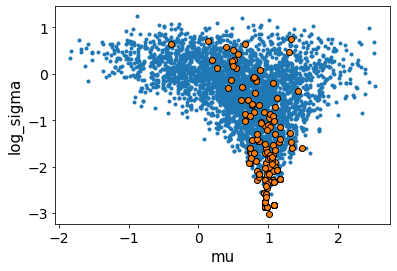

In [10]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

##### Variant B

In [11]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [12]:
result = model.sample(data={'N':5, 'y':[1.05, 0.87, -0.49, -0.22, 0.18]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


In [13]:
print(result.diagnose())

Processing csv files: /var/folders/3c/q2s2z4v92bx59zp2nvycr10c0000gn/T/tmpz9yh42m6/stan1-20220321232952_1.csv, /var/folders/3c/q2s2z4v92bx59zp2nvycr10c0000gn/T/tmpz9yh42m6/stan1-20220321232952_2.csv, /var/folders/3c/q2s2z4v92bx59zp2nvycr10c0000gn/T/tmpz9yh42m6/stan1-20220321232952_3.csv, /var/folders/3c/q2s2z4v92bx59zp2nvycr10c0000gn/T/tmpz9yh42m6/stan1-20220321232952_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [14]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

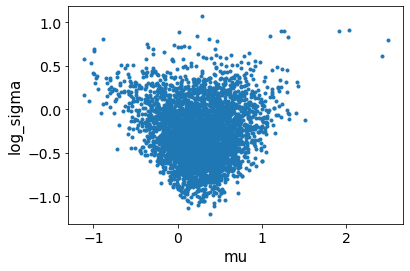

In [15]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

## Excercise 2 - Binominial example

In [16]:
#Data read fromm coin.csv

df = pd.read_csv("coin.csv")

df.head


<bound method NDFrame.head of      Experiment_Id  Toss_Result
0              892            0
1              893            0
2              894            1
3              895            0
4              896            0
..             ...          ...
413           1305            0
414           1306            1
415           1307            1
416           1308            0
417           1309            1

[418 rows x 2 columns]>

In [17]:
y = list(df["Toss_Result"])
N = len(df["Toss_Result"])

In [18]:
model = CmdStanModel(stan_file='stan2.stan')
result = model.sample(data={"N" : N, "y" : y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan2.stan to exe file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan2
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan2.hpp /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan2.stan
Warning in '/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan2.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code 

In [19]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-290.00,0.01700,0.720,-290.00,-290.00,-290.0,1700.0,12000.0,1.0
theta,0.46,0.00065,0.024,0.42,0.46,0.5,1400.0,10000.0,1.0


In [20]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

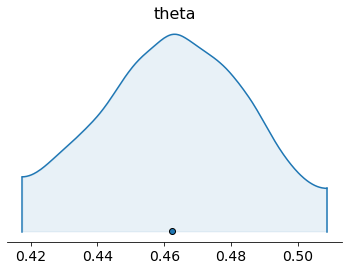

In [21]:
#Plot
az.plot_density(arviz_result,shade=0.1)

## Excercise 3 - Predictive checks


In [22]:
df = pd.read_csv("normal.csv")

print(df.head)

<bound method NDFrame.head of     Unnamed: 0  value
0            0 -0.039
1            1  1.085
2            2 -2.794
3            3  1.652
4            4  1.380
..         ...    ...
95          95  0.191
96          96  0.461
97          97  0.103
98          98  0.706
99          99  1.382

[100 rows x 2 columns]>


In [23]:
y = list(df["value"])
N = len(df["value"])

In [24]:
print(y)

[-0.039, 1.085, -2.7939999999999996, 1.652, 1.38, -0.29, 0.069, -1.258, 0.7809999999999999, -0.441, 0.83, -1.193, 1.77, 0.838, -0.023, -1.375, 1.589, 0.961, -0.825, 0.085, -1.712, -0.555, -0.266, -0.424, -0.966, -0.158, -0.146, -0.6859999999999999, 0.271, 1.446, 1.161, 1.053, -0.40399999999999997, -0.23, 1.061, 0.20600000000000002, 0.23800000000000002, 0.7859999999999999, 0.514, 0.085, -1.262, -0.114, -0.179, -0.27, -1.42, 1.197, -0.40299999999999997, -3.181, 0.8290000000000001, -0.461, -0.7490000000000001, -0.297, 0.7140000000000001, -0.374, -1.1909999999999998, -0.728, -0.596, -0.626, 1.3869999999999998, 0.573, -0.175, -0.605, 0.287, -1.1340000000000001, -1.183, -0.7290000000000001, 0.174, -0.32799999999999996, 0.743, 1.192, 0.5920000000000001, 1.385, -0.245, -1.015, -1.631, -1.22, -1.069, 2.314, -1.0659999999999998, -0.9279999999999999, 1.9869999999999999, -0.875, -0.278, 0.013999999999999999, 1.58, 0.258, -1.038, 0.742, -1.669, 0.124, 1.082, -0.99, 0.743, -1.136, 0.915, 0.191, 0.46

In [25]:
print(N)

100


#### Posterior predictive

In [26]:
model = CmdStanModel(stan_file='stan3.stan')

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan3.stan to exe file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan3
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan3


In [27]:
result = model.sample(data={'N':N, 'y':y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


In [28]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-53.0000,0.0250,1.000,-55.00,-53.0000,-52.00,1700.0,3800.0,1.0
mu,-0.0350,0.0019,0.100,-0.21,-0.0350,0.13,2900.0,6300.0,1.0
sigma,1.0000,0.0013,0.072,0.91,1.0000,1.10,3000.0,6700.0,1.0
y_rep[1],-0.0230,0.0160,1.000,-1.70,-0.0260,1.70,4313.0,9458.0,1.0
y_rep[2],-0.0530,0.0160,1.000,-1.80,-0.0520,1.60,4136.0,9070.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[96],-0.0370,0.0170,1.000,-1.70,-0.0300,1.60,3923.0,8602.0,1.0
y_rep[97],-0.0540,0.0170,1.100,-1.80,-0.0640,1.70,3963.0,8690.0,1.0
y_rep[98],-0.0180,0.0170,1.000,-1.70,-0.0230,1.70,3943.0,8647.0,1.0


In [29]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result,
    posterior_predictive=["y_rep"],
    observed_data={"y": y},
)
arviz_result

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<AxesSubplot:xlabel='y / y_rep'>

/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


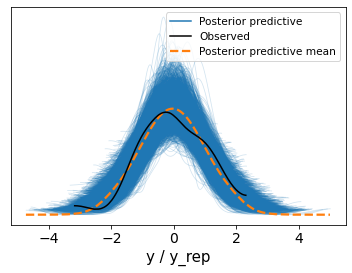

In [30]:
#Arviz plot
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})

#### Prior predictive

In [31]:
model = CmdStanModel(stan_file='stan4.stan')

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan4.stan to exe file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan4
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan4
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan4.hpp /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan4.stan
Warning in '/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab3_Probability_distribution/stan4.stan', line 7, column 25: Use
    of the `abs` function with real-valued arguments is deprecated; use
    function `fabs` instead.

--- Compiling, linking C++ code ---
clang++ -std=c++1y -Wno-unknown-warning-option -Wno-tautological-compare -Wno-sign-compare -D_REENTRANT -Wno-ignored-attributes      -I s

In [32]:
result = model.sample(data={'N':100}, 
                            chains = 1,
                            fixed_param=True,
                            seed = 523833
                            )

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0000,NaN,0.0,0.000,0.0000,0.0,NaN,NaN,NaN
mu,-0.0220,0.031,1.0,-1.700,-0.0150,1.6,1100.0,16000.0,1.0
sigma,0.7900,0.019,0.6,0.041,0.6700,1.9,1000.0,16000.0,1.0
y_prior[1],-0.0540,0.042,1.4,-2.300,-0.0740,2.3,1126.0,17601.0,1.0
y_prior[2],0.0360,0.045,1.4,-2.100,-0.0077,2.4,1003.0,15674.0,1.0
...,...,...,...,...,...,...,...,...,...
y_prior[96],-0.0490,0.042,1.3,-2.200,-0.0060,2.0,1045.0,16325.0,1.0
y_prior[97],0.0027,0.050,1.4,-2.100,0.0300,2.2,770.0,12030.0,1.0
y_prior[98],-0.0190,0.041,1.4,-2.100,-0.0500,2.3,1178.0,18406.0,1.0


In [34]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    prior=result,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

Inference data with groups:
	> prior
	> prior_predictive
	> sample_stats_prior
	> observed_data

<AxesSubplot:xlabel='y / y_prior'>

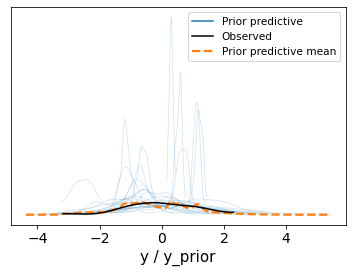

In [35]:
az.plot_ppc(arviz_result, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-9.61215  , -9.4290228, -9.2458956, -9.0627684, -8.8796412,
        -8.696514 , -8.5133868, -8.3302596, -8.1471324, -7.9640052,
        -7.780878 , -7.5977508, -7.4146236, -7.2314964, -7.0483692,
        -6.865242 , -6.6821148, -6.4989876, -6.3158604, -6.1327332,
        -5.949606 , -5.7664788, -5.5833516, -5.4002244, -5.2170972,
        -5.03397  , -4.8508428, -4.6677156, -4.4845884, -4.3014612,
        -4.118334 , -3.9352068, -3.7520796, -3.5689524, -3.3858252,
        -3.202698 , -3.0195708, -2.8364436, -2.6533164, -2.4701892,
        -2.287062 , -2.1039348, -1.9208076, -1.7376804, -1.5545532,
        -1.371426 , -1.1882988, -1.0051716, -0.8220444, -0.6389172,
        -0.45579  , -0.2726628, -0.0895356,  0.0935916,  0.2767188,
   

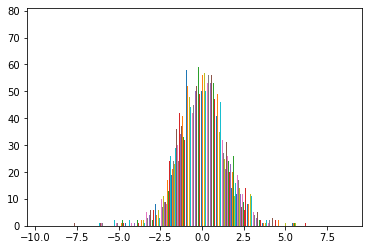

In [36]:
#Draw y_prior histogram
#...

plt.hist(result.stan_variable("y_prior"), bins=100)